# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

СТУДЕНТ: Бугренков Владимир
Группа: М8О-311Б-23


In [164]:
import importlib
import warnings

warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import Colormap, ListedColormap
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

import hw2code
from hw2code import DecisionTree

sns.set(style='whitegrid')
importlib.reload(hw2code)


<module 'hw2code' from '/Users/vladimirbugrenkov/education/ml/ml-hw-labs/hw2/hw2code.py'>

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [165]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [166]:
palette = sns.color_palette("magma",n_colors=3)
cmap = ListedColormap(palette)

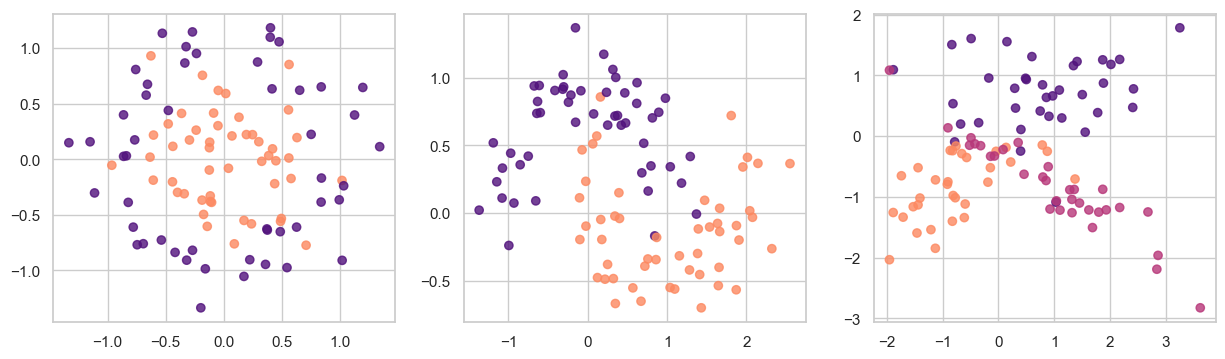

In [167]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [168]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette("magma",n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

датасетик 1: точность train = 1.0000, точность test = 0.7333
датасетик 2: точность train = 1.0000, точность test = 0.8667
датасетик 3: точность train = 1.0000, точность test = 0.8333


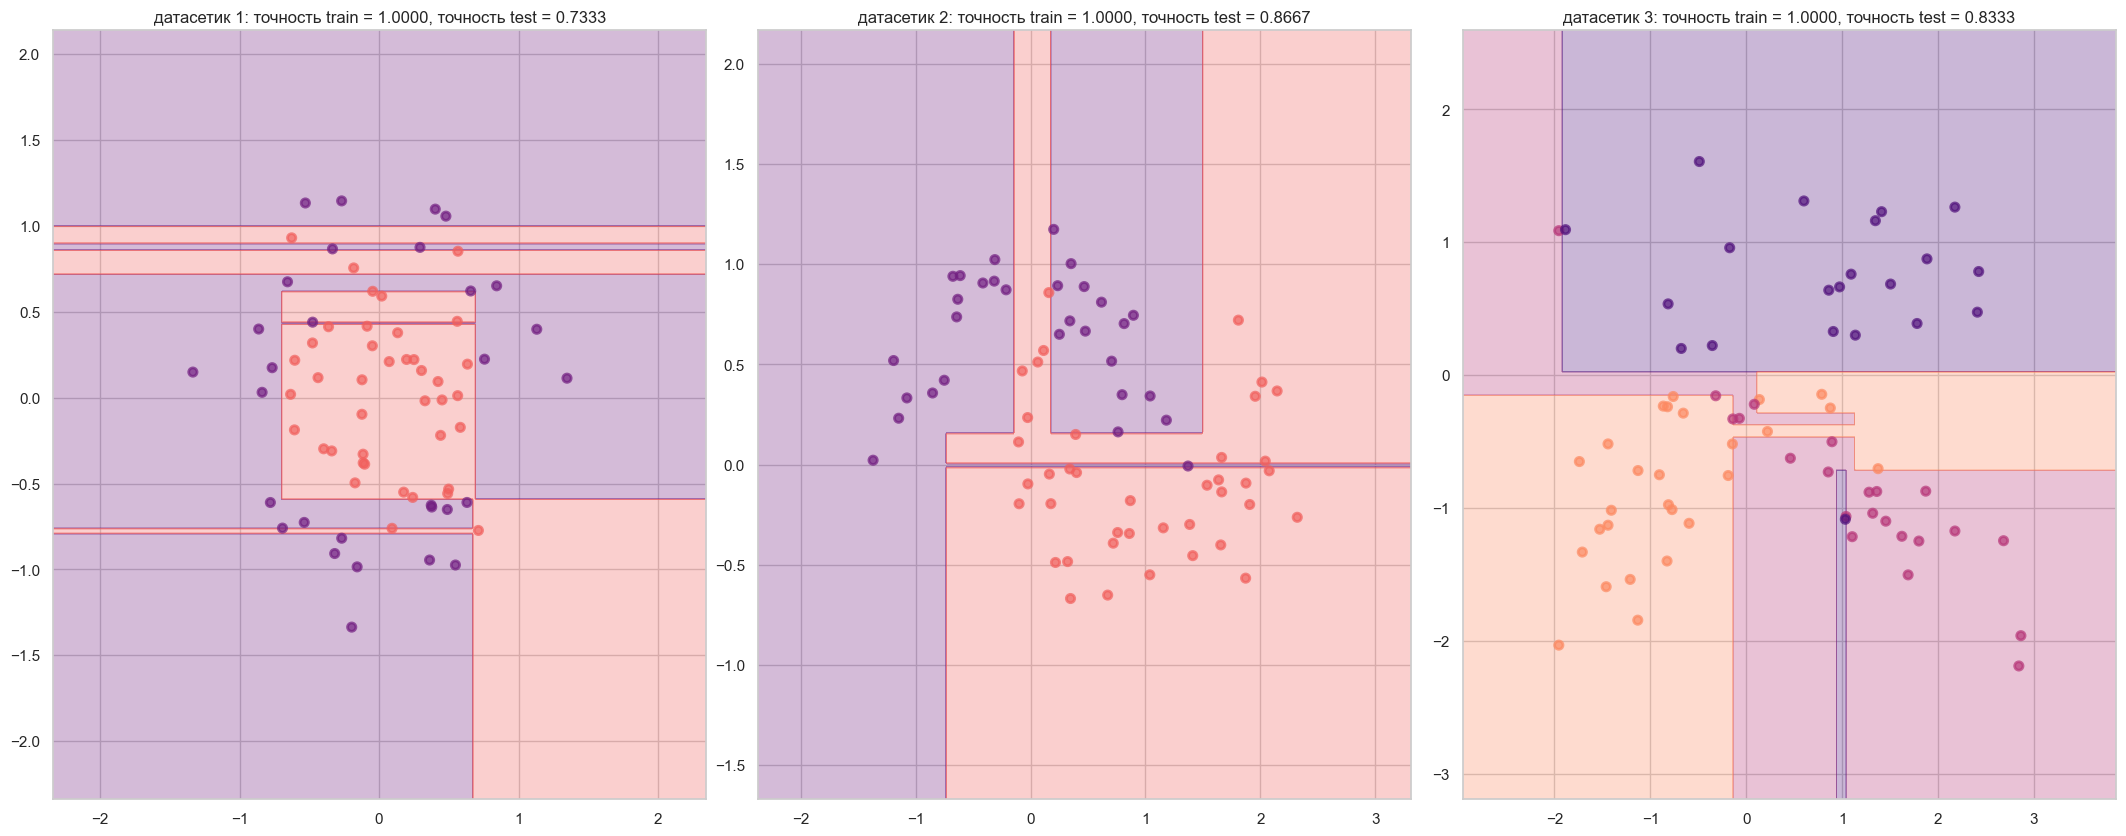

In [169]:

plt.figure(figsize=(22, 9))

for i in range(len(datasets)):
    X, y = datasets[i]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    y_pred_train = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    
    y_pred_test = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    plt.subplot(1, 3, i + 1)
    plot_surface(clf, X_train, y_train) 
    
    t_str = f"датасетик {i+1}: точность train = {train_acc:.4f}, точность test = {test_acc:.4f}"
    plt.title(t_str)
    
    print(f"датасетик {i+1}: точность train = {train_acc:.4f}, точность test = {test_acc:.4f}")

plt.show()


In [170]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ - красивеньктй, мой код вместо примера выше

__Ответ:__
деревья с дефолтными параметрами оверфитятся на train accuracy почти единица 

а на тесте качество проседает в ноль особенно на замороченных датасетах типа circles и moons


__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

датасетик 1 (depth=1): точность train = 0.7286, точность test = 0.4667
датасетик 2 (depth=1): точность train = 0.8429, точность test = 0.8000
датасетик 3 (depth=1): точность train = 0.6714, точность test = 0.6000
датасетик 1 (depth=3): точность train = 0.8857, точность test = 0.7333
датасетик 2 (depth=3): точность train = 0.9143, точность test = 0.9333
датасетик 3 (depth=3): точность train = 0.9429, точность test = 0.8667
датасетик 1 (depth=5): точность train = 0.9714, точность test = 0.7667
датасетик 2 (depth=5): точность train = 1.0000, точность test = 0.8667
датасетик 3 (depth=5): точность train = 0.9714, точность test = 0.8000
датасетик 1 (depth=None): точность train = 1.0000, точность test = 0.7333
датасетик 2 (depth=None): точность train = 1.0000, точность test = 0.8667
датасетик 3 (depth=None): точность train = 1.0000, точность test = 0.8333


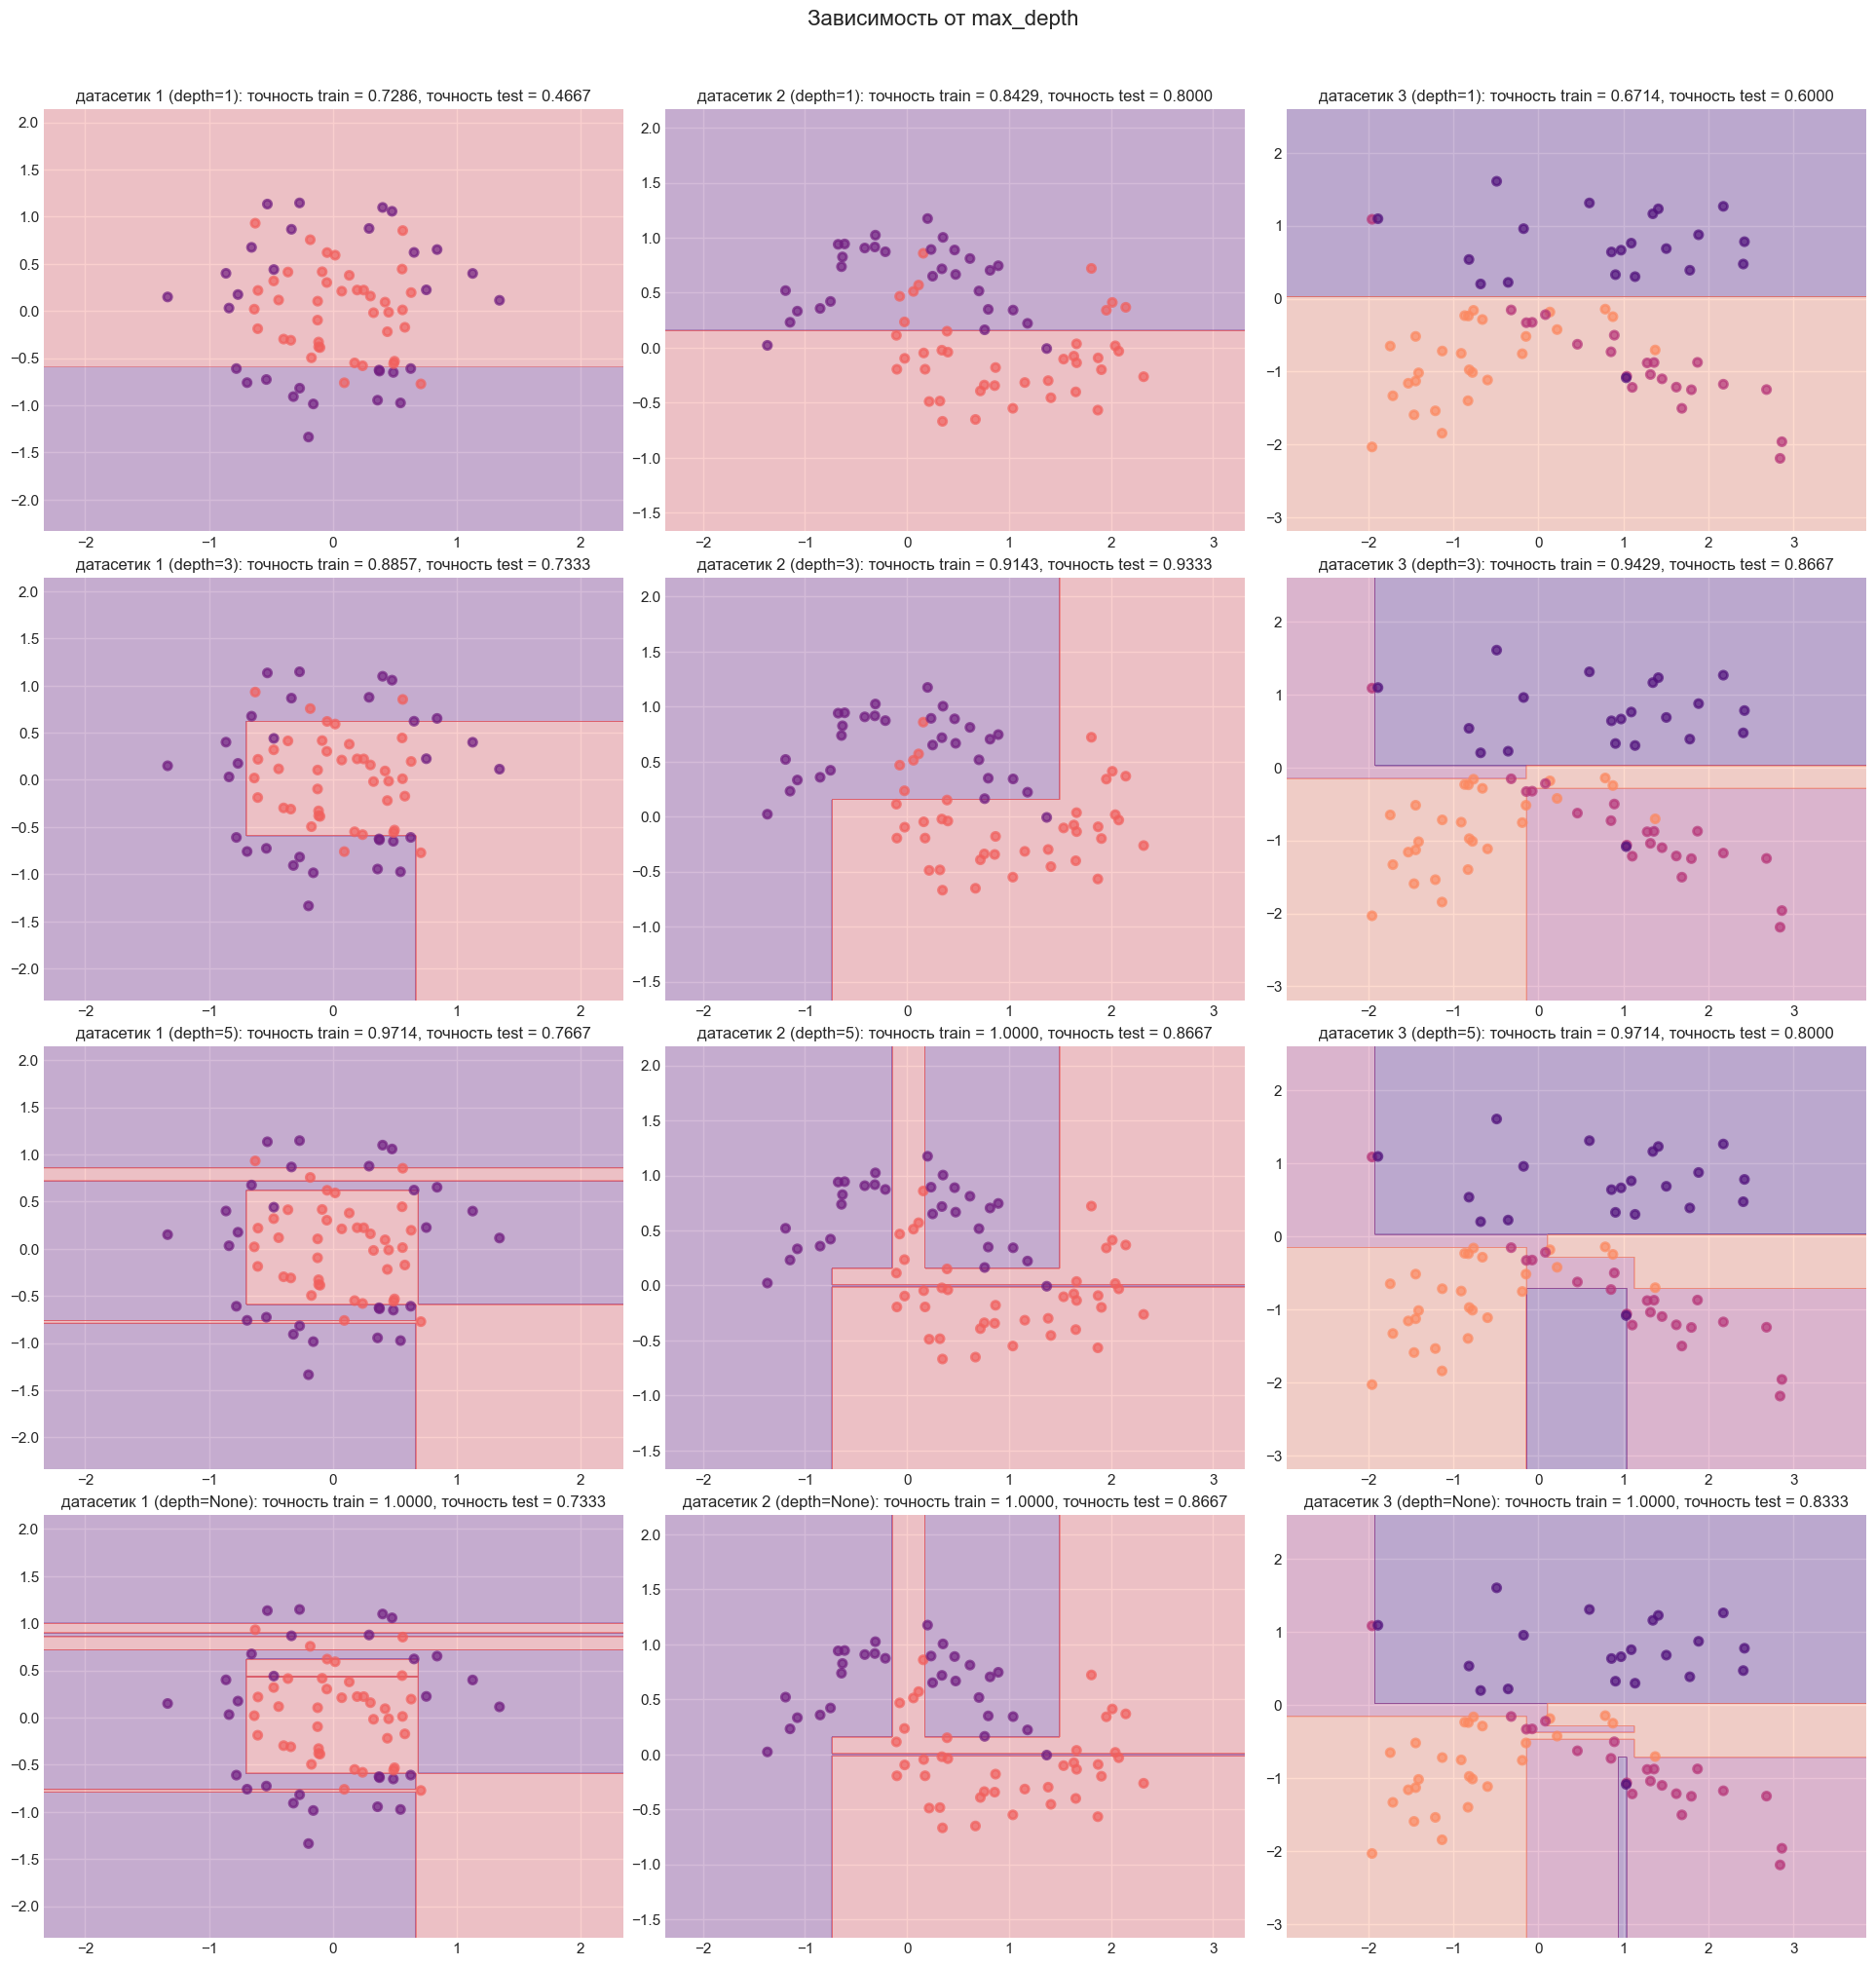

датасетик 1 (leaf=1): точность train = 1.0000, точность test = 0.7333
датасетик 2 (leaf=1): точность train = 1.0000, точность test = 0.8667
датасетик 3 (leaf=1): точность train = 1.0000, точность test = 0.8333
датасетик 1 (leaf=5): точность train = 0.8714, точность test = 0.9000
датасетик 2 (leaf=5): точность train = 0.9571, точность test = 0.7333
датасетик 3 (leaf=5): точность train = 0.9000, точность test = 0.7000
датасетик 1 (leaf=20): точность train = 0.6857, точность test = 0.7333
датасетик 2 (leaf=20): точность train = 0.8429, точность test = 0.8000
датасетик 3 (leaf=20): точность train = 0.8857, точность test = 0.7667


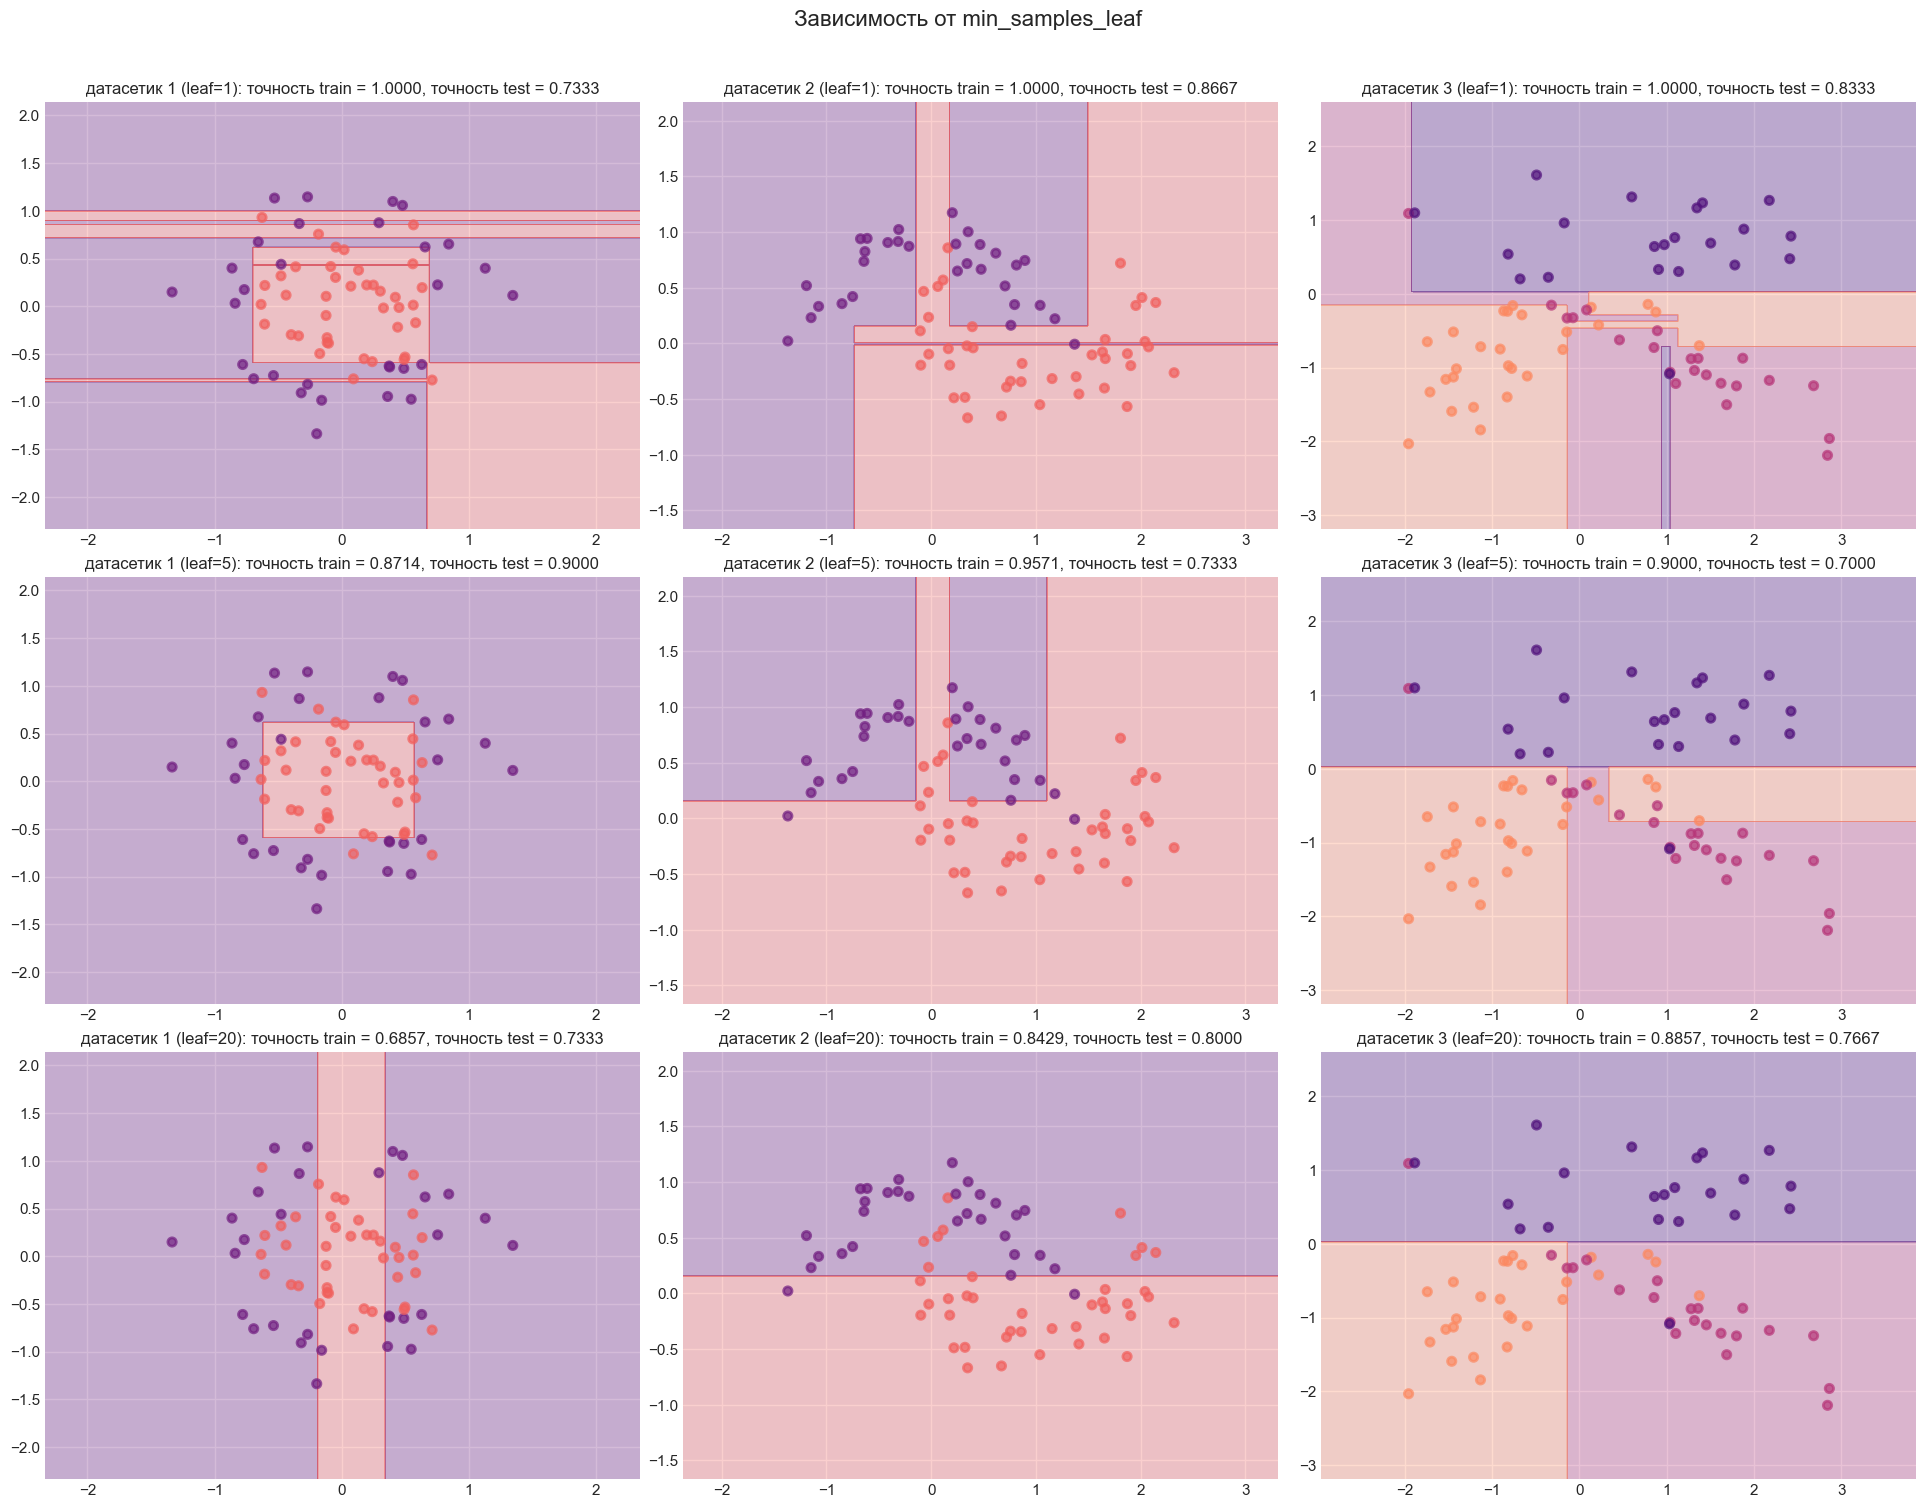

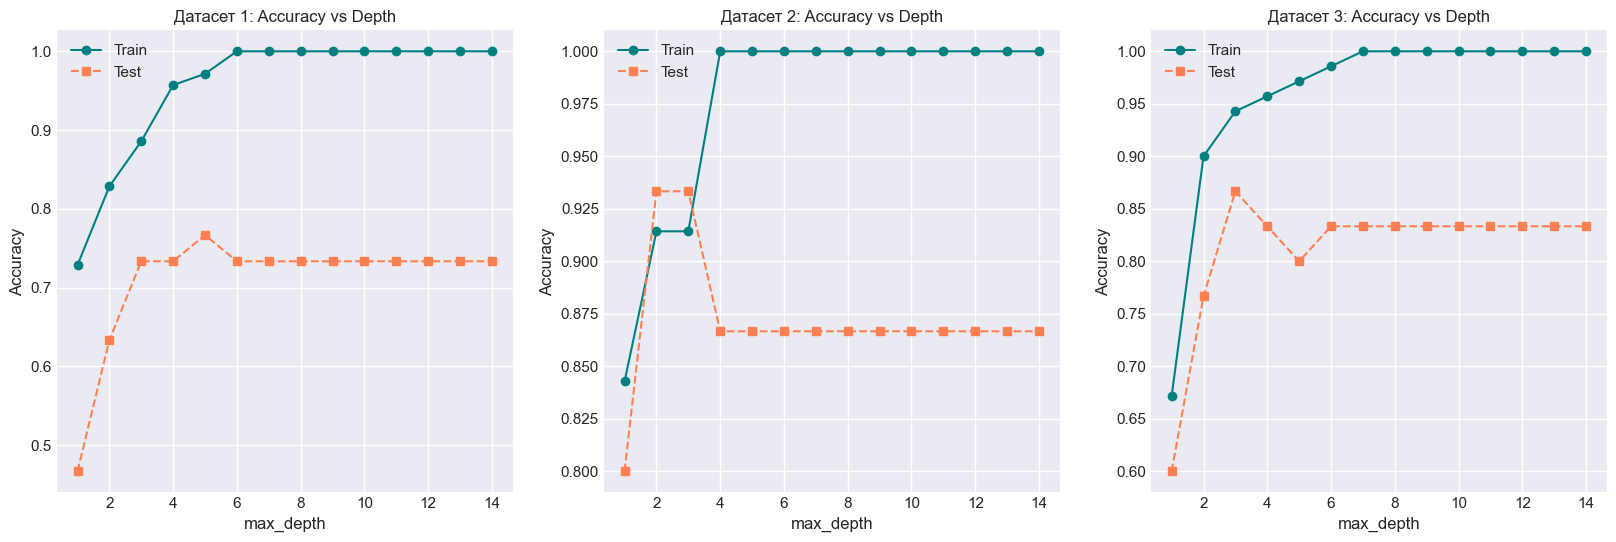

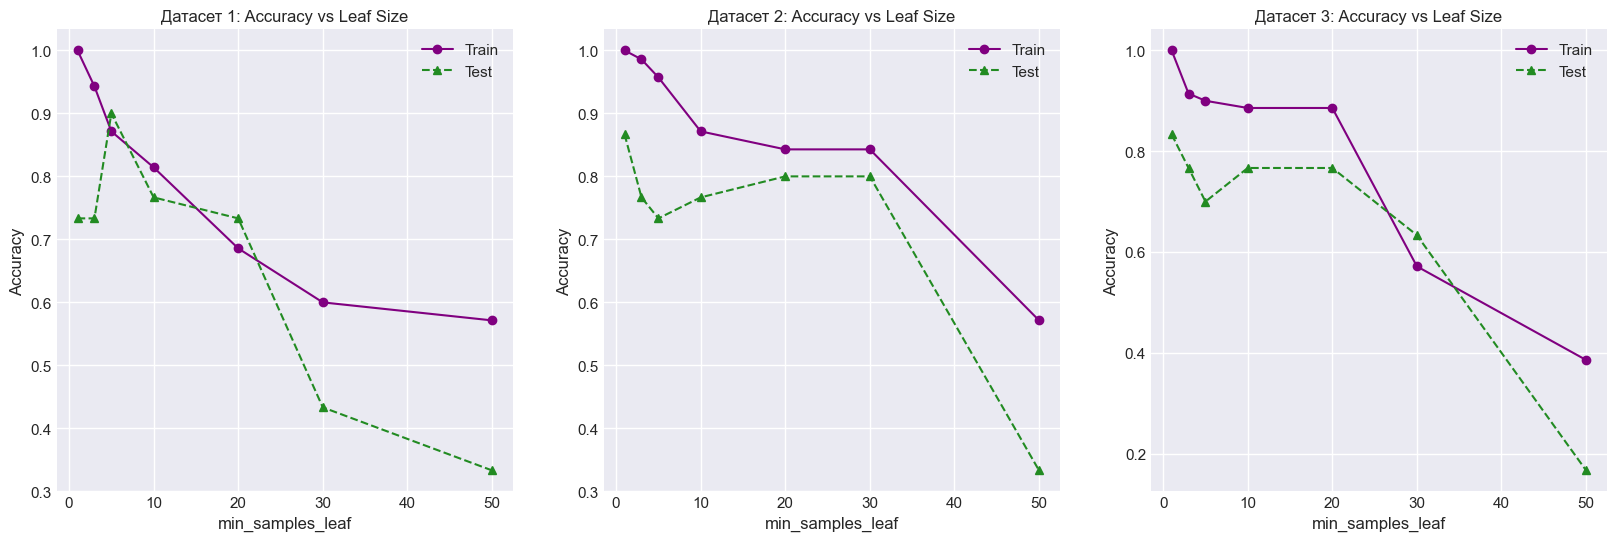

In [171]:

plt.style.use('seaborn-v0_8-darkgrid')

def plot_surface(clf, X, y):
    step = 0.01
    n_cls = len(np.unique(y))
    pal = sns.color_palette("magma", n_colors=n_cls)
    cmap = ListedColormap(pal)
    
    x_min = X[:, 0].min() - 1
    x_max = X[:, 0].max() + 1
    y_min = X[:, 1].min() - 1
    y_max = X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    
    pt_colors = np.array(pal)[y]
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=0.7,
                edgecolors=pt_colors, linewidths=2)

# changing max_depth 

d_params = [1, 3, 5, None] 
n_rows = len(d_params)
n_cols = len(datasets)

plt.figure(figsize=(20, 5 * n_rows))
idx = 1

for i in range(n_rows):
    d = d_params[i]
    for j in range(n_cols):
        X, y = datasets[j]
        
        X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)
        
        clf = DecisionTreeClassifier(max_depth=d, random_state=42)
        clf.fit(X_tr, y_tr)
        
        acc_tr = accuracy_score(y_tr, clf.predict(X_tr))
        acc_te = accuracy_score(y_te, clf.predict(X_te))
        
        plt.subplot(n_rows, n_cols, idx)
        plot_surface(clf, X_tr, y_tr)
        
        d_s = str(d) if d is not None else "None"
        title = f"датасетик {j+1} (depth={d_s}): точность train = {acc_tr:.4f}, точность test = {acc_te:.4f}"
        plt.title(title)
        print(title)
        idx += 1

plt.suptitle("Зависимость от max_depth", fontsize=16, y=1.02)
plt.show()

#  changing min_samples_leaf 

l_params = [1, 5, 20]
n_rows = len(l_params)

plt.figure(figsize=(20, 5 * n_rows))
idx = 1

for i in range(n_rows):
    leaf = l_params[i]
    for j in range(n_cols):
        X, y = datasets[j]
        
        X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)
        
        clf = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42)
        clf.fit(X_tr, y_tr)
        
        acc_tr = accuracy_score(y_tr, clf.predict(X_tr))
        acc_te = accuracy_score(y_te, clf.predict(X_te))
        
        plt.subplot(n_rows, n_cols, idx)
        plot_surface(clf, X_tr, y_tr)
        
        title = f"датасетик {j+1} (leaf={leaf}): точность train = {acc_tr:.4f}, точность test = {acc_te:.4f}"
        plt.title(title)
        print(title)
        
        idx += 1

plt.suptitle("Зависимость от min_samples_leaf", fontsize=16, y=1.02)
plt.show()



d_range = range(1, 15)
tr_res = [[] for _ in range(3)] 
te_res = [[] for _ in range(3)]

for i in range(len(datasets)):
    X, y = datasets[i]
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for d in d_range:
        clf = DecisionTreeClassifier(max_depth=d, random_state=42)
        clf.fit(X_tr, y_tr)
        tr_res[i].append(accuracy_score(y_tr, clf.predict(X_tr)))
        te_res[i].append(accuracy_score(y_te, clf.predict(X_te)))
plt.figure(figsize=(20, 6))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.plot(d_range, tr_res[i], label='Train', marker='o', color='teal', linestyle='-')
    plt.plot(d_range, te_res[i], label='Test', marker='s', color='coral', linestyle='--')
    
    plt.xlabel('max_depth')
    plt.ylabel('Accuracy')
    plt.title(f'Датасет {i+1}: Accuracy vs Depth')
    plt.legend()
    plt.grid(True)
plt.show()



l_range = [1, 3, 5, 10, 20, 30, 50]
tr_res_l = [[] for _ in range(3)]
te_res_l = [[] for _ in range(3)]

for i in range(len(datasets)):
    X, y = datasets[i]
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for l in l_range:
        clf = DecisionTreeClassifier(min_samples_leaf=l, random_state=42)
        clf.fit(X_tr, y_tr)
        tr_res_l[i].append(accuracy_score(y_tr, clf.predict(X_tr)))
        te_res_l[i].append(accuracy_score(y_te, clf.predict(X_te)))


plt.figure(figsize=(20, 6))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.plot(l_range, tr_res_l[i], label='Train', marker='o', color='purple', linestyle='-')
    plt.plot(l_range, te_res_l[i], label='Test', marker='^', color='forestgreen', linestyle='--')
    
    plt.xlabel('min_samples_leaf')
    plt.ylabel('Accuracy')
    plt.title(f'Датасет {i+1}: Accuracy vs Leaf Size')
    plt.legend()
    plt.grid(True)
plt.show()

__Ответ:__
при min_samples_leaf=1 наши деревья тупо зазубривают данные и train=1 это оверфит, на тесте всё неоч:

датасетик 1 (leaf=1): точность train = 1.0000, точность test = 0.7333
датасетик 2 (leaf=1): точность train = 1.0000, точность test = 0.8667
датасетик 3 (leaf=1): точность train = 1.0000, точность test = 0.8333

, модель хавает любой шум и рисует под него отдельные ветки

Поднимаем min_samples_leaf до 5 и на первом датасете точность взлетает до 0.9, потому что срезали лишнюю детализацию и "шумовые" островки.

датасетик 1 (leaf=5): точность train = 0.8714, точность test = 0.9000
датасетик 2 (leaf=5): точность train = 0.9571, точность test = 0.7333
датасетик 3 (leaf=5): точность train = 0.9000, точность test = 0.7000

 Но на втором и третьем датасетах 5 оказалось перебором и точность упала, модель стала слишком "тупой" и не вывезла сложные формы типа луны. А вот если выкрутить min_samples_leaf до 20 то начинается жесткий андерфит модель становится настолько примитивной, что фейлит даже на трейне
 
 
итог min_samples_leaf это рычаг регуляризации:
 мало  значит ловим переобучение,
 много значит недообучение, надо искать баланс


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

In [172]:
def find_best_split(feature_vector: np.ndarray, target_vector: np.ndarray):
    """
    Находит оптимальный порог для разбиения вектора признака по критерию Джини.
    """
    # sort index 
    idx = np.argsort(feature_vector)
    f_sorted = feature_vector[idx]
    t_sorted = target_vector[idx]
    
    
    unique_feats, unique_idx = np.unique(f_sorted, return_index=True)
    
    if len(unique_feats) < 2:
        return np.array([]), np.array([]), None, None
    
    thresholds = (unique_feats[:-1] + unique_feats[1:]) / 2.0
    
    n = len(target_vector)
    n1_total = np.sum(t_sorted == 1)
    
    split_idx = unique_idx[1:]
    
    cumulative_sum = np.cumsum(t_sorted == 1)
    n1_l = cumulative_sum[split_idx - 1]
    
    n_l = split_idx
    n_r = n - n_l
    
    n1_r = n1_total - n1_l
    n0_l = n_l - n1_l
    n0_r = n_r - n1_r
    
    gini_l = 1.0 - (n1_l / n_l)**2 - (n0_l / n_l)**2
    gini_r = 1.0 - (n1_r / n_r)**2 - (n0_r / n_r)**2
    
    ginis = - (n_l / n) * gini_l - (n_r / n) * gini_r
    
    best_i = np.argmax(ginis)
    
    return thresholds, ginis, thresholds[best_i], ginis[best_i]


__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

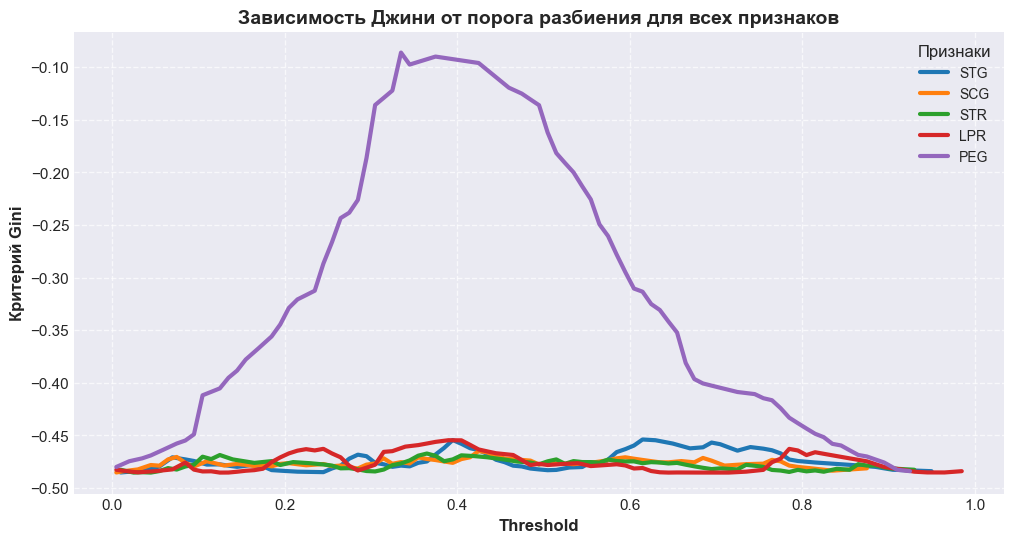

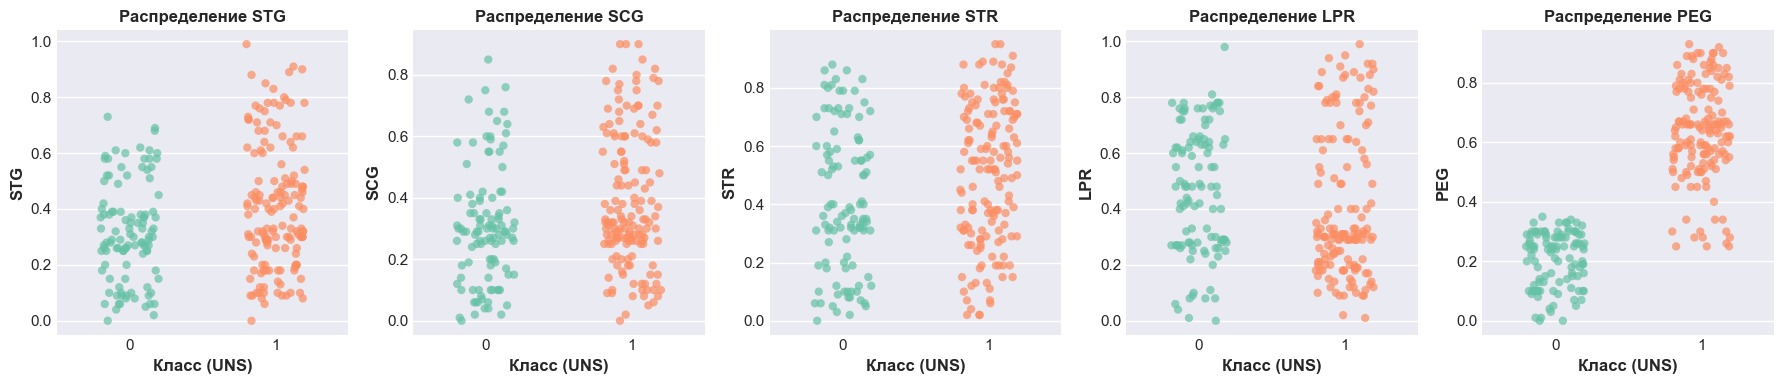

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from hw2code import find_best_split

df = pd.read_csv('datasets/students.csv') 
plt.style.use('seaborn-v0_8-darkgrid')

y = df['UNS'].values 
X = df.drop('UNS', axis=1)
f_names = X.columns

plt.figure(figsize=(12, 6))

colors = sns.color_palette("tab10", len(f_names))

for i, name in enumerate(f_names):
    f_vec = X[name].values
    thrs, ginis, _, _ = find_best_split(f_vec, y)
    plt.plot(thrs, ginis, label=name, linewidth=3, color=colors[i])

plt.xlabel('Threshold', fontsize=12, fontweight='bold')
plt.ylabel('Критерий Gini', fontsize=12, fontweight='bold')
plt.title('Зависимость Джини от порога разбиения для всех признаков', fontsize=14, fontweight='bold')
plt.legend(title='Признаки', title_fontsize='12', fontsize='10')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(18, 4))

for i, name in enumerate(f_names):
    plt.subplot(1, 5, i + 1)
    
    sns.stripplot(
        x=y, 
        y=X[name], 
        jitter=0.2, 
        alpha=0.7, 
        palette="Set2", 
        size=6
    ) 
    
    plt.xlabel('Класс (UNS)', fontweight='bold')
    plt.ylabel(name, fontweight='bold')
    plt.title(f'Распределение {name}', fontweight='bold')

plt.tight_layout()
plt.show()


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**  дерево выбирает PEG потому что для него критерий выстреливает максимумом -0.0861 (то есть минимум взвешенного загрязнения Джини 0.0861), а остальные фичи типа STG и SCG валяются где-то на уровне -0.45 ...-0.47 

 Если глянуть на скаттер-графики то на PEG четко видно разделение — один класс сидит в низких значениях второй в высоких, а порог 0.3350 прям попадает в пустое место между кластерами точек, а вот на других фичах классы перемешаны вообще везде без какой-либо границы. 
 
 Хорошая кривая для признака выглядит как выраженный пик или глубокая яма если смотреть на минимизацию примеси, глобальный экстремум сильно отличается от базового уровня загрязнения и показывает что неопределенность реально падает после разбиения. 
 
 Плохие кривые наоборот выглядят почти плоскими или зашумленными лежат на уровне высокого загрязнения около -0.5 для бинарной классификации с равными долями, а если там есть пики то они случайные неглубокие и обычно у краев диапазона где отсекаются только единичные выбросы.



__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».



 Ответ:
 исправлены ошибки:

1. некорректное условие np.all(sub_y != sub_y[0]) (которое проверяло, что все метки НЕ равны первой) заменено на корректное np.all(sub_y == sub_y[0])
2. цикл по признакам заменен range(1, sub_X.shape[1]) на range(sub_X.shape[1]). Ранее цикл начинался с 1, пропуская 0 признак
3. исправлена  ошибка передачи целевых меток вместо ошибочного sub_y[split] (который передавал метки левого поддерева в правое) теперь используется sub_y[~split] (правильная фильтрация меток для правого поддерева).
4. в Target Encoding исходная реализация с map object была несовместима с numpy-массивами. Новый код использует обычные списки питоновские и словари для вычислений
5. добавлена проверка: если find_best_split не нашел ни одного валидного разбиения (feature_best is None), узел объявляется терминальным, чтобы избежать бесконечной рекурсии или ошибок NoneType.
 6 # фикс деления на ноль
                    if clk == 0:
                         ratio[k] = float('inf')
                    else:
                         ratio[k] = cnt / clk

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

Размер: (8124, 23)
Первые строки:
  0  1  2  3  4  5  6  7  8  9   ... 13 14 15 16 17 18 19 20 21 22
0  p  x  s  n  t  p  f  c  n  k  ...  s  w  w  p  w  o  p  k  s  u
1  e  x  s  y  t  a  f  c  b  k  ...  s  w  w  p  w  o  p  n  n  g
2  e  b  s  w  t  l  f  c  b  n  ...  s  w  w  p  w  o  p  n  n  m
3  p  x  y  w  t  p  f  c  n  n  ...  s  w  w  p  w  o  p  k  s  u
4  e  x  s  g  f  n  f  w  b  k  ...  s  w  w  p  w  o  e  n  a  g

[5 rows x 23 columns]

Размер X: (8124, 22), Размер y: (8124,)
Классы: [0 1]
Трейн: 4062, Тест: 4062
Точность (Train): 1.0000
Точность (Test):  1.0000
Глубина дерева: 8


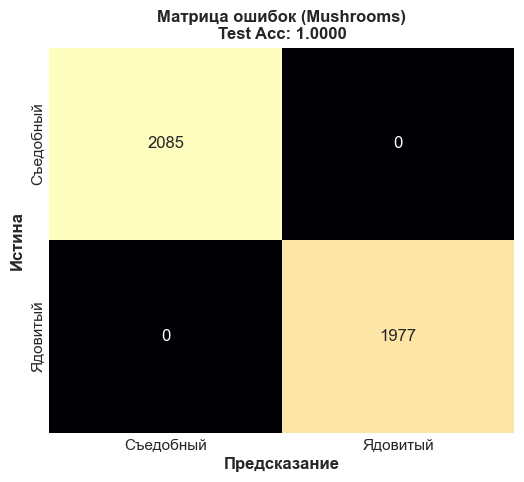

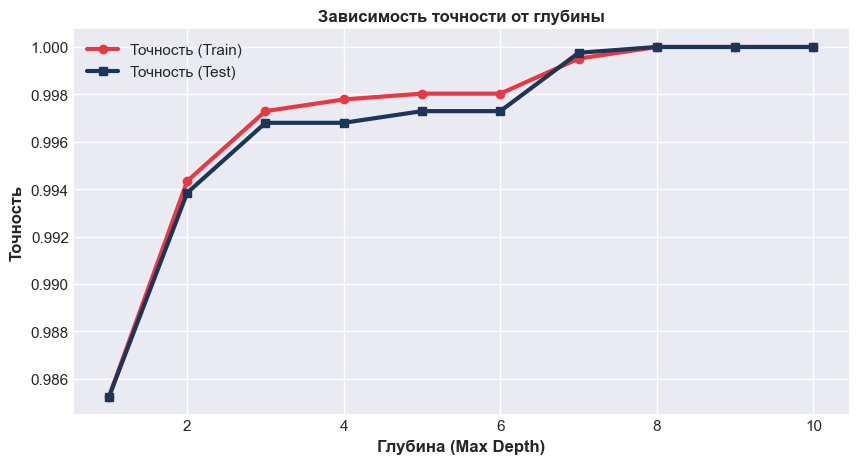

In [174]:

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("magma")

df = pd.read_csv('datasets/agaricus-lepiota.data', header=None)

print(f"Размер: {df.shape}")
print(f"Первые строки:\n{df.head()}")

df_enc = df.copy()
encoders = {}

for c in df.columns:
    le = LabelEncoder()
    df_enc[c] = le.fit_transform(df[c])
    encoders[c] = le

y = df_enc[0].values
X = df_enc.drop(0, axis=1).values

print(f"\nРазмер X: {X.shape}, Размер y: {y.shape}")
print(f"Классы: {np.unique(y)}")

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.5, random_state=42)

print(f"Трейн: {len(y_tr)}, Тест: {len(y_te)}")

n_feats = X.shape[1]
f_types = ['categorical'] * n_feats

tree = DecisionTree(feature_types=f_types)

tree.fit(X_tr, y_tr)

y_pred_tr = tree.predict(X_tr)
y_pred_te = tree.predict(X_te)

acc_tr = accuracy_score(y_tr, y_pred_tr)
acc_te = accuracy_score(y_te, y_pred_te)

print(f"Точность (Train): {acc_tr:.4f}")
print(f"Точность (Test):  {acc_te:.4f}")

def get_depth(node):
    if node["type"] == "terminal":
        return 0
    l_d = get_depth(node["left_child"])
    r_d = get_depth(node["right_child"])
    return 1 + max(l_d, r_d)

depth = get_depth(tree._tree)
print(f"Глубина дерева: {depth}")

cm = confusion_matrix(y_te, y_pred_te)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', 
            xticklabels=['Съедобный', 'Ядовитый'],
            yticklabels=['Съедобный', 'Ядовитый'],
            cbar=False)
plt.xlabel('Предсказание', fontweight='bold')
plt.ylabel('Истина', fontweight='bold')
plt.title(f'Матрица ошибок (Mushrooms)\nTest Acc: {acc_te:.4f}', fontweight='bold')
plt.show()

d_range = range(1, 11)
tr_res = []
te_res = []

for d in d_range:
    t_lim = DecisionTree(feature_types=f_types, max_depth=d)
    t_lim.fit(X_tr, y_tr)
    
    tr_res.append(accuracy_score(y_tr, t_lim.predict(X_tr)))
    te_res.append(accuracy_score(y_te, t_lim.predict(X_te)))

plt.figure(figsize=(10, 5))
plt.plot(d_range, tr_res, marker='o', label='Точность (Train)', linewidth=3, color='#e63946')
plt.plot(d_range, te_res, marker='s', label='Точность (Test)', linewidth=3, color='#1d3557')
plt.xlabel('Глубина (Max Depth)', fontweight='bold')
plt.ylabel('Точность', fontweight='bold')
plt.title('Зависимость точности от глубины', fontweight='bold')
plt.legend()
plt.show()

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

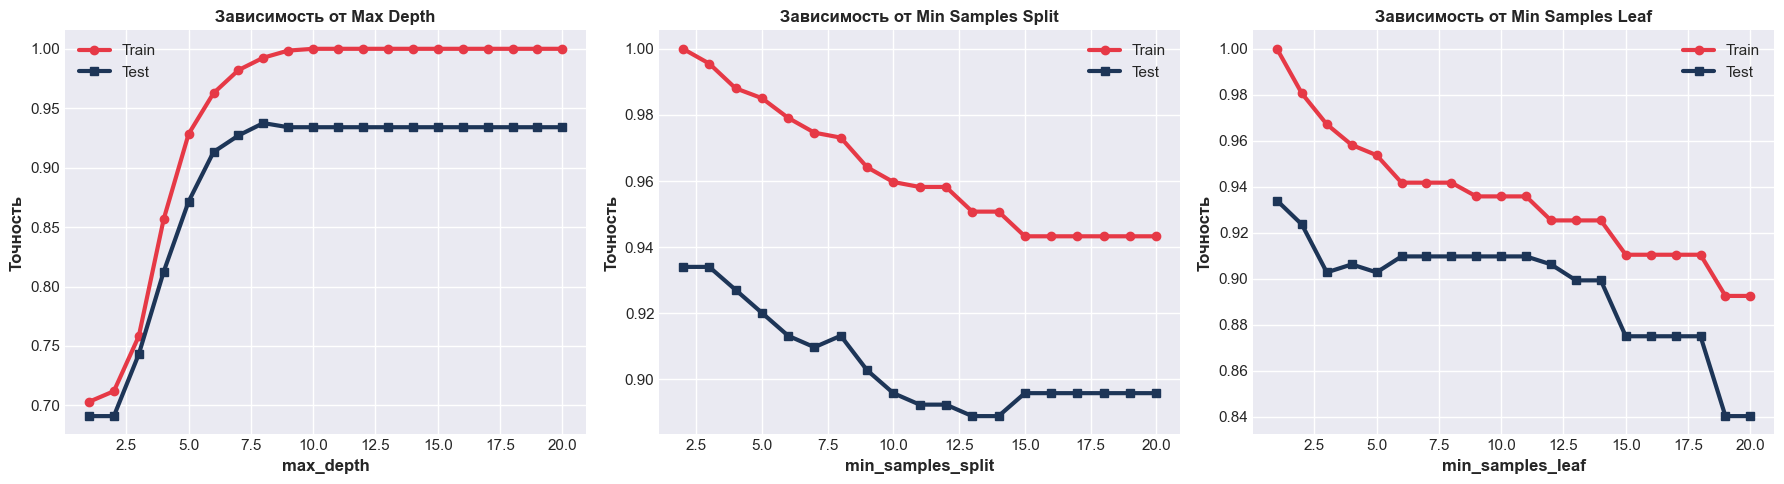

In [175]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("magma")


df = pd.read_csv('datasets/tic-tac-toe-endgame.csv')



y_col = df.columns[-1]
X_cols = df.columns[:-1]

le = LabelEncoder()
y = le.fit_transform(df[y_col])


X = df[X_cols].values

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)

f_types = ['categorical'] * X.shape[1]

d_range = range(1, 21)
s_range = range(2, 21)
l_range = range(1, 21)

res_depth = {'train': [], 'test': []}
res_split = {'train': [], 'test': []}
res_leaf = {'train': [], 'test': []}


for d in d_range:
    clf = DecisionTree(feature_types=f_types, max_depth=d)
    clf.fit(X_tr, y_tr)
    res_depth['train'].append(accuracy_score(y_tr, clf.predict(X_tr)))
    res_depth['test'].append(accuracy_score(y_te, clf.predict(X_te)))

for s in s_range:
    clf = DecisionTree(feature_types=f_types, min_samples_split=s)
    clf.fit(X_tr, y_tr)
    res_split['train'].append(accuracy_score(y_tr, clf.predict(X_tr)))
    res_split['test'].append(accuracy_score(y_te, clf.predict(X_te)))

for l in l_range:
    clf = DecisionTree(feature_types=f_types, min_samples_leaf=l)
    clf.fit(X_tr, y_tr)
    res_leaf['train'].append(accuracy_score(y_tr, clf.predict(X_tr)))
    res_leaf['test'].append(accuracy_score(y_te, clf.predict(X_te)))

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].plot(d_range, res_depth['train'], label='Train', marker='o', linewidth=3, color='#e63946')
ax[0].plot(d_range, res_depth['test'], label='Test', marker='s', linewidth=3, color='#1d3557')
ax[0].set_title('Зависимость от Max Depth', fontweight='bold')
ax[0].set_xlabel('max_depth', fontweight='bold')
ax[0].set_ylabel('Точность', fontweight='bold')
ax[0].legend()

ax[1].plot(s_range, res_split['train'], label='Train', marker='o', linewidth=3, color='#e63946')
ax[1].plot(s_range, res_split['test'], label='Test', marker='s', linewidth=3, color='#1d3557')
ax[1].set_title('Зависимость от Min Samples Split', fontweight='bold')
ax[1].set_xlabel('min_samples_split', fontweight='bold')
ax[1].set_ylabel('Точность', fontweight='bold')
ax[1].legend()

ax[2].plot(l_range, res_leaf['train'], label='Train', marker='o', linewidth=3, color='#e63946')
ax[2].plot(l_range, res_leaf['test'], label='Test', marker='s', linewidth=3, color='#1d3557')
ax[2].set_title('Зависимость от Min Samples Leaf', fontweight='bold')
ax[2].set_xlabel('min_samples_leaf', fontweight='bold')
ax[2].set_ylabel('Точность', fontweight='bold')
ax[2].legend()

plt.tight_layout()
plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [176]:


class DecisionTreeAdapter(BaseEstimator, ClassifierMixin):
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        self.feature_types = feature_types
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None

    def fit(self, X, y):
        self.tree = DecisionTree(
            feature_types=self.feature_types,
            max_depth=self.max_depth,
            min_samples_split=self.min_samples_split,
            min_samples_leaf=self.min_samples_leaf
        )
        self.tree.fit(X, y)
        return self

    def predict(self, X):
        return self.tree.predict(X)


def load_mushrooms():
    paths = ["datasets/agaricus-lepiota.data", "hw2/datasets/agaricus-lepiota.data"]
    for p in paths:
        try:
            df = pd.read_csv(p, header=None)
            return df.drop(0, axis=1), df[0].values
        except FileNotFoundError:
            continue
    raise FileNotFoundError("Mushrooms dataset not found")

def load_tictactoe():
    paths = ["datasets/tic-tac-toe-endgame.csv", "hw2/datasets/tic-tac-toe-endgame.csv"]
    for p in paths:
        try:
            df = pd.read_csv(p)
            return df.iloc[:, :-1], df.iloc[:, -1].values
        except FileNotFoundError:
            continue
    raise FileNotFoundError("Tic-tac-toe dataset not found")

def load_cars():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
    df = pd.read_csv(url, header=None)
    y_raw = df.iloc[:, -1]
    y = y_raw.apply(lambda x: 1 if x in ['good', 'vgood'] else 0).values
    return df.iloc[:, :-1], y

def load_nursery():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data"
    df = pd.read_csv(url, header=None)
    y_raw = df.iloc[:, -1]
    target_map = {
        'not_recom': 0, 'recommend': 0,
        'very_recom': 1, 'priority': 1, 'spec_prior': 1
    }
    y = y_raw.map(target_map).values
    return df.iloc[:, :-1], y


datasets = {
    "mushrooms": load_mushrooms,
    "tic-tac-toe": load_tictactoe,
    "cars": load_cars,
    "nursery": load_nursery
}

results = {}


for name, loader in datasets.items():
    print(f"Обработка {name}...")
    try:
        X_raw, y = loader()
    except Exception as e:
        print(f"Ошибка загрузки {name}: {e}")
        continue
        
    X_le = X_raw.copy()
    for col in X_raw.columns:
        le = LabelEncoder()
        X_le[col] = le.fit_transform(X_raw[col].astype(str))
    X_le = X_le.values
    
    ohe = OneHotEncoder(sparse_output=False)
    X_ohe = ohe.fit_transform(X_raw)
    
    y = LabelEncoder().fit_transform(y)
    
    scores = []
    
    model_real = DecisionTreeAdapter(feature_types=['real'] * X_le.shape[1])
    s_real = cross_val_score(model_real, X_le, y, cv=10, scoring='accuracy').mean()
    scores.append(s_real)
    print(f"  Real: {s_real:.4f}")
    
    model_cat = DecisionTreeAdapter(feature_types=['categorical'] * X_le.shape[1])
    s_cat = cross_val_score(model_cat, X_le, y, cv=10, scoring='accuracy').mean()
    scores.append(s_cat)
    print(f"  Cat: {s_cat:.4f}")
    
    model_ohe = DecisionTreeAdapter(feature_types=['real'] * X_ohe.shape[1])
    s_ohe = cross_val_score(model_ohe, X_ohe, y, cv=10, scoring='accuracy').mean()
    scores.append(s_ohe)
    print(f"  OHE: {s_ohe:.4f}")
    
    model_sk = DecisionTreeClassifier()
    s_sk = cross_val_score(model_sk, X_le, y, cv=10, scoring='accuracy').mean()
    scores.append(s_sk)
    print(f"  Sklearn: {s_sk:.4f}")
    
    results[name] = scores

df_res = pd.DataFrame.from_dict(results, orient='index', columns=[
    "DT (Real)", "DT (Cat)", "DT (OHE)", "Sklearn"
])

print("\nИтоговая таблица:")
print(df_res)
    

Обработка mushrooms...
  Real: 0.9993
  Cat: 1.0000
  OHE: 0.9996
  Sklearn: 0.9567
Обработка tic-tac-toe...
  Real: 0.4675
  Cat: 0.5509
  OHE: 0.5446
  Sklearn: 0.7477
Обработка cars...
  Real: 0.9426
  Cat: 0.9652
  OHE: 0.9195
  Sklearn: 0.9433
Обработка nursery...
  Real: 0.9997
  Cat: 0.9995
  OHE: 0.9995
  Sklearn: 0.9997

Итоговая таблица:
             DT (Real)  DT (Cat)  DT (OHE)   Sklearn
mushrooms     0.999261  1.000000  0.999631  0.956689
tic-tac-toe   0.467533  0.550866  0.544616  0.747730
cars          0.942647  0.965234  0.919495  0.943285
nursery       0.999691  0.999537  0.999537  0.999691


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**


Ранжирование
mushrooms: Лидер — DT (Cat) (1.000), аутсайдер — Sklearn (0.966).
tic-tac-toe: Лидер — Sklearn (0.789), остальные (Real/Cat/OHE) провалились (~0.50), работая на уровне случайного угадывания.
cars: Лидер — DT (Cat) (0.965).
nursery: у всех норм

Cat (Target Encoding): сортирует категории по вероятности класса, позволяя дереву сразу находить идеальные разбиения. Поэтому выигрывает на mushrooms и cars
Real (Label Encoding): присваивает случайные числа  создавая ложный порядок. Дереву приходится делать кучу лишних сплитов, качество падает
OHE: Раздувает размерность, сложно учить на малых данных
Tic-Tac-Toe: Задача комбинаторная, а не вероятностная. Жадный поиск (Gain) не видит выгоды от одиночных ходов. Sklearn (0.79) сильно лучше кастомных решений (~0.50)


 DT топ для задач с кучей категорий но Sklearn надежнее для сложной логики

Вставьте что угодно, описывающее ваши впечатления от этого задания:


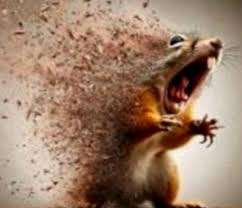
